<Axes: title={'center': 'networks/Net1.inp'}>

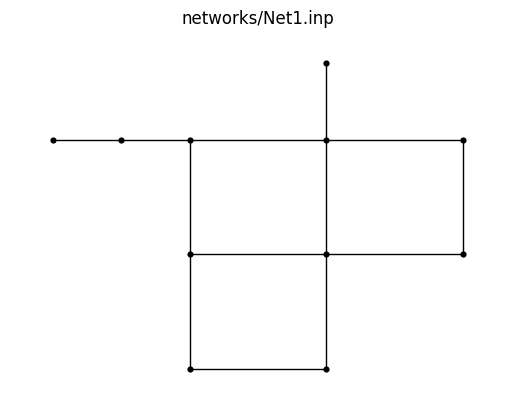

In [1]:

import wntr
import wntr_quantum

# Create a water network model
inp_file = 'networks/Net1.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name)


In [2]:
# Simulate hydraulics
from dwave.samplers import SimulatedAnnealingSampler
from quantum_newton_raphson.splu_solver import SPLU_SOLVER, QUBOReorder

# instantiate the quantum reorder solver using a DWAVE sampler
reorder_solver = QUBOReorder(
    sampler = SimulatedAnnealingSampler()
)
# define the linear solver with the reorder solver
linear_solver = SPLU_SOLVER(reorder_solver=reorder_solver)

sim = wntr_quantum.sim.QuantumWNTRSimulator(wn)
results = sim.run_sim(linear_solver=linear_solver)

c:\Users\NicolasRenaud\Anaconda3\envs\vitens\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


<Axes: title={'center': 'Pressure at 5 hours'}>

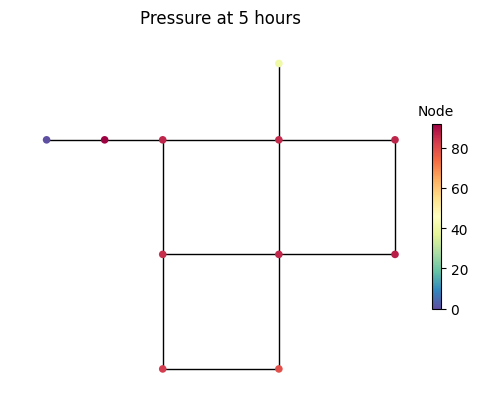

In [ ]:
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[5*3600, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=30,
                        title='Pressure at 5 hours')

In [ ]:
import numpy as np 
np.log2(212)

7.727920454563199